# EDA

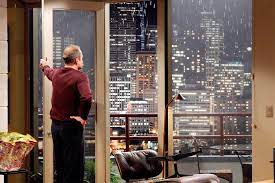

In [344]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px



from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [345]:
df = pd.read_csv("data/eda.csv")

In [346]:
df.head()

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


# Column Names and descriptions for King County Data Set

- **id** - unique identified for a house

- **dateDate** - house was sold

- **pricePrice** - is prediction target

- **bedroomsNumber** - # of bedrooms

- **bathroomsNumber** - # of bathrooms

- **sqft_livingsquare** - footage of the home

- **sqft_lotsquare** - footage of the lot

- **floorsTotal** - floors (levels) in house

- **waterfront** - House which has a view to a waterfront

- **view** - Has been viewed

- **condition** - How good the condition is ( Overall )

- **grade** - overall grade given to the housing unit, based on King County grading system

- **sqft_above** - square footage of house apart from basement

- **sqft_basement** - square footage of the basement

- **yr_built** - Built Year

- **yr_renovated** - Year when house was renovated

- **zipcode** - zip

- **lat** - Latitude coordinate

- **long** - Longitude coordinate

- **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors

- **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

In [348]:
df.shape

(21597, 23)

In [349]:
df.describe()

,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,...,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,4580474287.771,10799.000,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,...,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284
std,367368.140,2876735715.748,6234.661,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,...,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442
min,78000.000,1000102.000,1.000,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,...,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,322000.000,2123049175.000,5400.000,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,...,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3904930410.000,10799.000,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,...,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,7308900490.000,16198.000,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,...,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,9900000190.000,21597.000,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,...,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


# duplicates

In [350]:
df.duplicated().value_counts()

False    21597
dtype: int64

# clean data

In [351]:
df.drop(["id","id.1"], axis=1, inplace=True)

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df['price'] = df['price'].round(0).astype(int)

df['bedrooms'] = df['bedrooms'].round(0).astype(int)

df['bathrooms'] = df['bathrooms'].round(0).astype(int)

df['floors'] = df['floors'].round(0).astype(int)

df['waterfront'] = df['waterfront'].map(lambda x: round(x) if pd.notnull(x) else np.nan).astype('Int64')

df['view'] = df['view'].map(lambda x: round(x) if pd.notnull(x) else np.nan).astype('Int64')

df['yr_renovated'] = df['yr_renovated'].apply(lambda x: int(x/10) if pd.notnull(x) else 9999).astype('Int64')


In [352]:
df.head(10)

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900,7129300520,3,1,1180.000,5650.000,1,<NA>,0,...,7,1180.000,0.000,1955,0,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000,6414100192,3,2,2570.000,7242.000,2,0,0,...,7,2170.000,400.000,1951,1991,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000,5631500400,2,1,770.000,10000.000,1,0,0,...,6,770.000,0.000,1933,9999,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000,2487200875,4,3,1960.000,5000.000,1,0,0,...,7,1050.000,910.000,1965,0,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000,1954400510,3,2,1680.000,8080.000,1,0,0,...,8,1680.000,0.000,1987,0,98074,47.617,-122.045,1800.000,7503.000
5,2014-05-12,1230000,7237550310,4,4,5420.000,101930.000,1,0,0,...,11,3890.000,1530.000,2001,0,98053,47.656,-122.005,4760.000,101930.000
6,2014-06-27,257500,1321400060,3,2,1715.000,6819.000,2,0,0,...,7,1715.000,NaN,1995,0,98003,47.310,-122.327,2238.000,6819.000
7,2015-01-15,291850,2008000270,3,2,1060.000,9711.000,1,0,<NA>,...,7,1060.000,0.000,1963,0,98198,47.410,-122.315,1650.000,9711.000
8,2015-04-15,229500,2414600126,3,1,1780.000,7470.000,1,0,0,...,7,1050.000,730.000,1960,0,98146,47.512,-122.337,1780.000,8113.000
9,2015-03-12,323000,3793500160,3,2,1890.000,6560.000,2,0,0,...,7,1890.000,0.000,2003,0,98038,47.368,-122.031,2390.000,7570.000


Thomas Hansen |	Buyer | 5 kids, no money, wants nice (social) neighborhood, Timing?, Location?

Assumption:
- Thomas comes with a big family. 5 kids + 2 adults, which leads to special requirements that needs to be fulfilled:
 
    a) Increased numbers of bedrooms: <= 6 bedrooms, >= 2 bedrooms 
    
    b) Increased numbers of bathrooms: >= 2 bathrooms
    
    c) Minimal sqm of living area: spm > 150
    
    d) (Optional) Lot area should match european average (100-200 sqm per person): 700-1400 sqm

- Along with this house specifications Thomas has a low budget, which limits the absolute overall price: max 200000

- Furthermore Thomas seeks for a nice, social neighborhood. Since people from the same social class get along best, its advised to
look for neighborhood houses that share same requirements like that from Thomas family (many bedrooms, low price etc.)

Research Question: 

1) PRICE: Considering the mentioned house specification in which areas are the house cheapest?

2) LOCATION: Considering Thomas low budget where are house located that match the desire for a nice social neighborhood?

3) TIMING: Considering Thomas low budget when is the best time to buy houses that match Thomas requirements in terms of price & location?

Hypothesis:

1) PRICE: If the number of bathrooms and bedrooms as well as the living space and plot area are high, then the price is based on the building age and renovation status.

2) LOCATION: Houses with similar features (which act as proxy for similiar family conditions) like price, bedroom counts are clustered. 

3) TIMING: Perfect time to buy houses cheapest are holiday seasons because amount of potentially buyers are lesser.


# features

In [353]:
df["sales_year"]=df["date"].dt.year

df["sales_month"]=df["date"].dt.month

df['building_age'] = datetime.datetime.now().year - df['yr_built']

df['years_ren_today'] = df['yr_renovated'].apply(lambda x: np.nan if ((x == 0) or (x==9999)) else datetime.datetime.now().year - x).astype('Int64')

df['years_ren_built'] = df['yr_renovated'] - df['yr_built']

df['years_ren_built'] = df['years_ren_built'].apply(lambda x: np.nan if ((x < 0) or (x>500)) else x).astype('Int64')

df['has_basement'] = df['sqft_basement'].apply(lambda x: True if x >= 0 else False)

df['sqft_living'] = df['sqft_living'].apply(lambda x: round(x/10.764))

df['sqft_lot'] = df['sqft_lot'].apply(lambda x: round(x/10.764))

df['sqft_above'] = df['sqft_above'].apply(lambda x: round(x/10.764))

df['sqft_basement'] = df['sqft_basement'].apply(lambda x: np.nan if pd.isnull(x) else round(x/10.764)).astype('Int64')

df['sqft_living15'] = df['sqft_living15'].apply(lambda x: np.nan if pd.isnull(x) else round(x/10.764)).astype('Int64')

df['sqft_lot15'] = df['sqft_lot15'].apply(lambda x: np.nan if pd.isnull(x) else round(x/10.764)).astype('Int64')

#calulate price per sqm
df['price_sqm'] = (df['price'] / df['sqft_living']).round(0).astype(int)

df['sqm_living_cat'] = pd.cut(df['sqft_living'], bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], labels=['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000'])

# create a new colums that cuts price into 10 bins
df['price_cat'] = pd.cut(df['price'], bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000], labels=['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-600k', '600k-700k', '700k-800k', '800k-900k', '900k-1M'])

# create new column that maps sales month to respective month name
df['sales_month_name'] = df['sales_month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                                                7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# rename columns
df.rename(columns={'sqft_living': 'sqm_living', 'sqft_lot': 'sqm_lot', 'sqft_above': 'sqm_above', 'sqft_basement': 'sqm_basement', 'sqft_living15': 'sqm_living15', 'sqft_lot15': 'sqm_lot15'}, inplace=True)

In [354]:
df.head(5)

,date,price,house_id,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,...,sales_year,sales_month,building_age,years_ren_today,years_ren_built,has_basement,price_sqm,sqm_living_cat,price_cat,sales_month_name
0,2014-10-13,221900,7129300520,3,1,110,525,1,<NA>,0,...,2014,10,68,<NA>,<NA>,True,2017,100-200,200k-300k,Oct
1,2014-12-09,538000,6414100192,3,2,239,673,2,0,0,...,2014,12,72,32,40,True,2251,200-300,500k-600k,Dec
2,2015-02-25,180000,5631500400,2,1,72,929,1,0,0,...,2015,2,90,<NA>,<NA>,True,2500,0-100,100k-200k,Feb
3,2014-12-09,604000,2487200875,4,3,182,465,1,0,0,...,2014,12,58,<NA>,<NA>,True,3319,100-200,600k-700k,Dec
4,2015-02-18,510000,1954400510,3,2,156,751,1,0,0,...,2015,2,36,<NA>,<NA>,True,3269,100-200,500k-600k,Feb


In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              21597 non-null  datetime64[ns]
 1   price             21597 non-null  int64         
 2   house_id          21597 non-null  int64         
 3   bedrooms          21597 non-null  int64         
 4   bathrooms         21597 non-null  int64         
 5   sqm_living        21597 non-null  int64         
 6   sqm_lot           21597 non-null  int64         
 7   floors            21597 non-null  int64         
 8   waterfront        19206 non-null  Int64         
 9   view              21534 non-null  Int64         
 10  condition         21597 non-null  int64         
 11  grade             21597 non-null  int64         
 12  sqm_above         21597 non-null  int64         
 13  sqm_basement      21145 non-null  Int64         
 14  yr_built          2159

# exploration

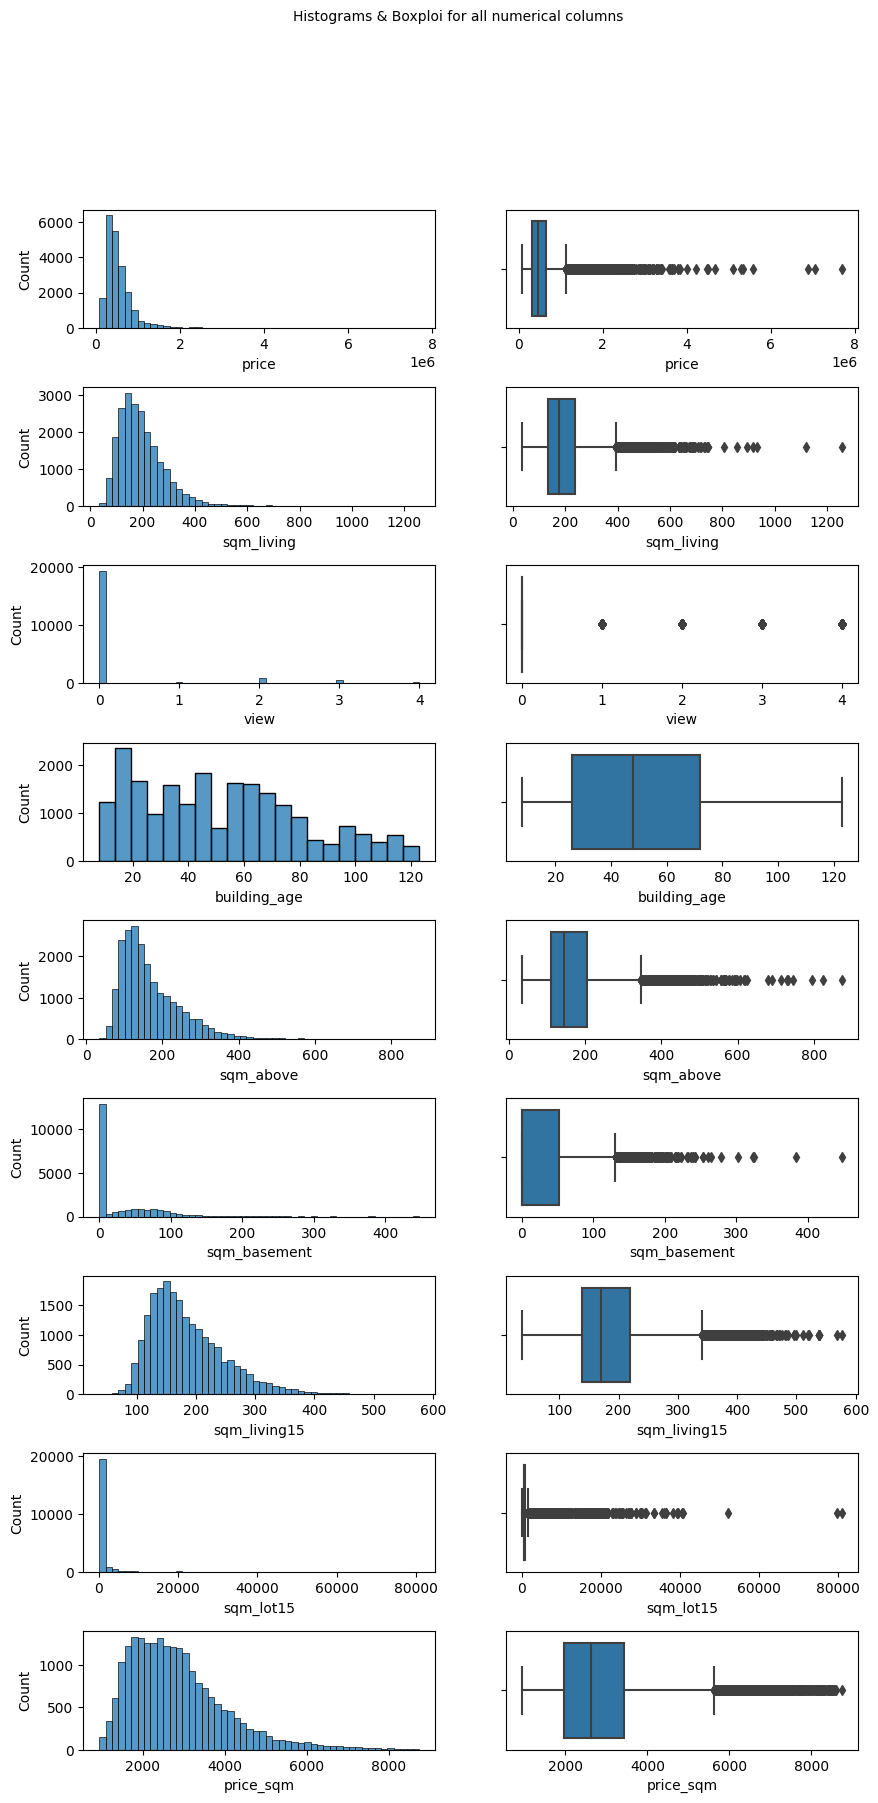

In [356]:
#with matplotlib create multiple histograms
fig, axes = plt.subplots(9, 2, figsize=(10, 20))
fig.suptitle('Histograms & Boxploi for all numerical columns', fontsize=10)
#add margin between subplots
fig.subplots_adjust(hspace=0.5)

sns.histplot(ax=axes[0, 0], data=df, x='price', bins=50)
sns.boxplot(ax=axes[0, 1], data=df, x='price')

sns.histplot(ax=axes[1, 0], data=df, x='sqm_living', bins=50)
sns.boxplot(ax=axes[1, 1], data=df, x='sqm_living')

sns.histplot(ax=axes[2, 0], data=df, x='view', bins=50)
sns.boxplot(ax=axes[2, 1], data=df, x='view')

sns.histplot(ax=axes[3, 0], data=df, x='building_age', bins=20)
sns.boxplot(ax=axes[3, 1], data=df, x='building_age')

sns.histplot(ax=axes[4, 0], data=df, x='sqm_above', bins=50)
sns.boxplot(ax=axes[4, 1], data=df, x='sqm_above')

sns.histplot(ax=axes[5, 0], data=df, x='sqm_basement', bins=50)
sns.boxplot(ax=axes[5, 1], data=df, x='sqm_basement')

sns.histplot(ax=axes[6, 0], data=df, x='sqm_living15', bins=50)
sns.boxplot(ax=axes[6, 1], data=df, x='sqm_living15')

sns.histplot(ax=axes[7, 0], data=df, x='sqm_lot15', bins=50)
sns.boxplot(ax=axes[7, 1], data=df, x='sqm_lot15')

sns.histplot(ax=axes[8, 0], data=df, x='price_sqm', bins=50)
sns.boxplot(ax=axes[8, 1], data=df, x='price_sqm')

plt.show()



# Question 1

Considering the mentioned house specification in which areas are the house cheapest?

Question 1 (PRICE): 
Considering the mentioned house specification in which areas are the house cheapest?

    a) Increased numbers of bedrooms: <= 6 bedrooms, >= 2 bedrooms 
    
    b) Increased numbers of bathrooms: >= 2 bathrooms
    
    c) Minimal sqm of living area: spm > 150
    
    d) (Optional) Lot area should match european average (100-200 sqm per person): 700-1400 sqm

Hypothesis: If the number of bathrooms and bedrooms as well as the living space and plot area are high, 
then the price is based on the building age and renovation status.

In [357]:
df_op = df[['price','price_cat','price_sqm','sqm_living', 'sqm_living_cat', 'sqm_lot',  'bedrooms', 'bathrooms','lat', 'long', 'sales_month','sales_month_name']]
df_op.head()

,price,price_cat,price_sqm,sqm_living,sqm_living_cat,sqm_lot,bedrooms,bathrooms,lat,long,sales_month,sales_month_name
0,221900,200k-300k,2017,110,100-200,525,3,1,47.511,-122.257,10,Oct
1,538000,500k-600k,2251,239,200-300,673,3,2,47.721,-122.319,12,Dec
2,180000,100k-200k,2500,72,0-100,929,2,1,47.738,-122.233,2,Feb
3,604000,600k-700k,3319,182,100-200,465,4,3,47.521,-122.393,12,Dec
4,510000,500k-600k,3269,156,100-200,751,3,2,47.617,-122.045,2,Feb


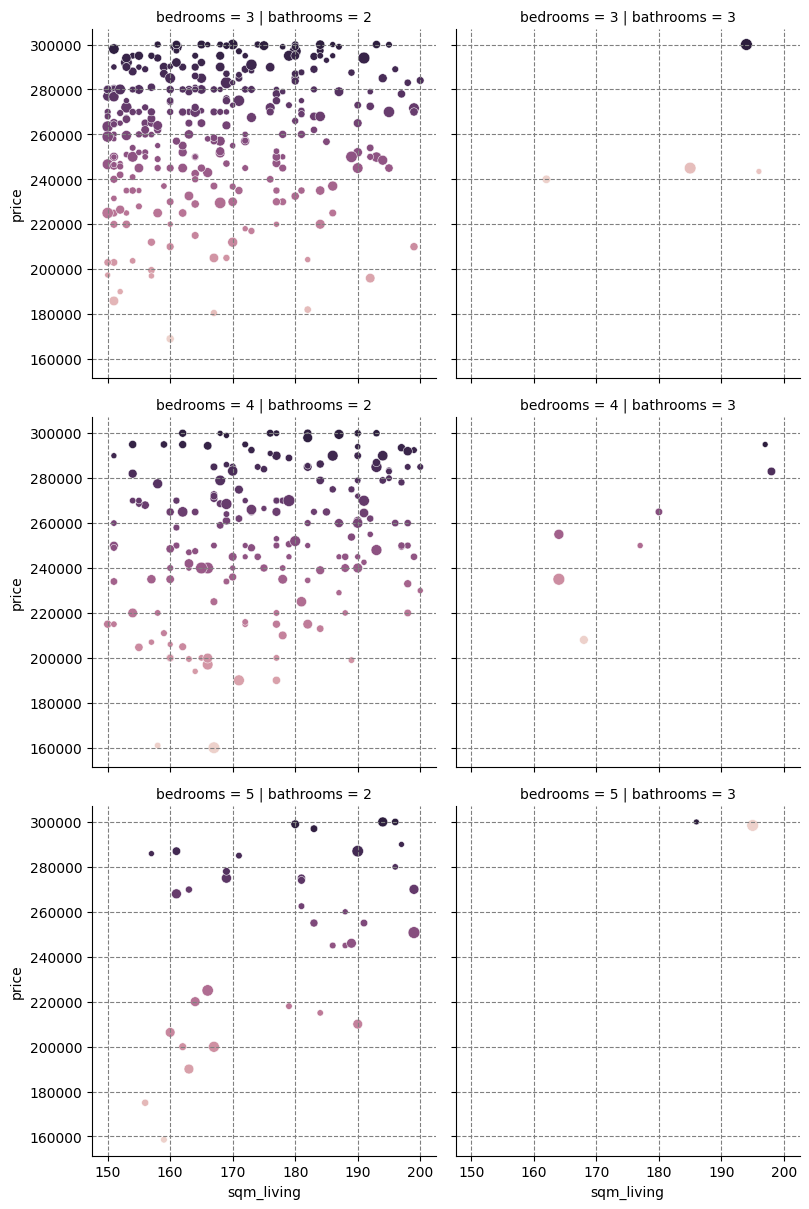

In [402]:
df_op_final = df_op[(df_op['bedrooms'] >= 2) & (df_op['bedrooms'] <= 6) & 
                    (df_op['bathrooms'] >= 2) & (df_op['bathrooms'] <= 3) & 
                    (df_op['sqm_living'] >= 150) & (df_op['sqm_living'] <= 200) & 
                    (df_op['sqm_lot'] >= 700) & (df_op['sqm_lot'] <= 1400) & 
                    (df_op['price'] >= 0) & (df_op['price'] <= 300000)
                    ]

df_op_final.sort_values('price')


g = sns.FacetGrid(df_op_final, col='bathrooms', row='bedrooms', height=4, aspect=1)

g.map_dataframe(sns.scatterplot, x='sqm_living', y='price', hue='price', size='sqm_lot')

g.map(plt.grid, linestyle='--', color='gray')

g.set_axis_labels('sqm_living', 'price')

#g.fig.suptitle('Price vs Price per sqm for bedrooms, bathrooms, sqm_living_cat', fontsize=10)

plt.show()

In [359]:
df_op_q1 = df_op[(df_op['bedrooms'] == 4) & 
                    (df_op['bathrooms'] == 2) & 
                    (df_op['sqm_living'] >= 150) & (df_op['sqm_living'] <= 170) & 
                    (df_op['sqm_lot'] >= 700) & (df_op['sqm_lot'] <= 1400) & 
                    (df_op['price'] >= 0) & (df_op['price'] <= 300000)
                    ]

df_op_q1.sort_values('price')

,price,price_cat,price_sqm,sqm_living,sqm_living_cat,sqm_lot,bedrooms,bathrooms,lat,long,sales_month,sales_month_name
11745,160000,100k-200k,958,167,100-200,1368,4,2,47.487,-122.223,2,Feb
13170,161000,100k-200k,1019,158,100-200,747,4,2,47.476,-122.288,8,Aug
14587,194000,100k-200k,1183,164,100-200,715,4,2,47.330,-122.318,3,Mar
13906,197000,100k-200k,1187,166,100-200,1226,4,2,47.467,-122.185,3,Mar
10904,199500,100k-200k,1224,163,100-200,754,4,2,47.510,-122.181,9,Sep
...,...,...,...,...,...,...,...,...,...,...,...,...
17118,294999,200k-300k,1916,154,100-200,907,4,2,47.364,-122.188,6,Jun
18950,295000,200k-300k,1855,159,100-200,819,4,2,47.395,-122.174,10,Oct
1551,299000,200k-300k,1769,169,100-200,704,4,2,47.434,-122.167,11,Nov
7948,299950,200k-300k,1785,168,100-200,706,4,2,47.286,-122.358,1,Jan


In [404]:
# create scatter_geo map with plotly express using lat and long of df_op_final
fig = px.scatter_mapbox(df_op_q1, lat='lat', lon='long', color='price', size='price', zoom=5, height=600)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0, 't':0, 'l':0, 'b':0})
fig.show()



# Question 2

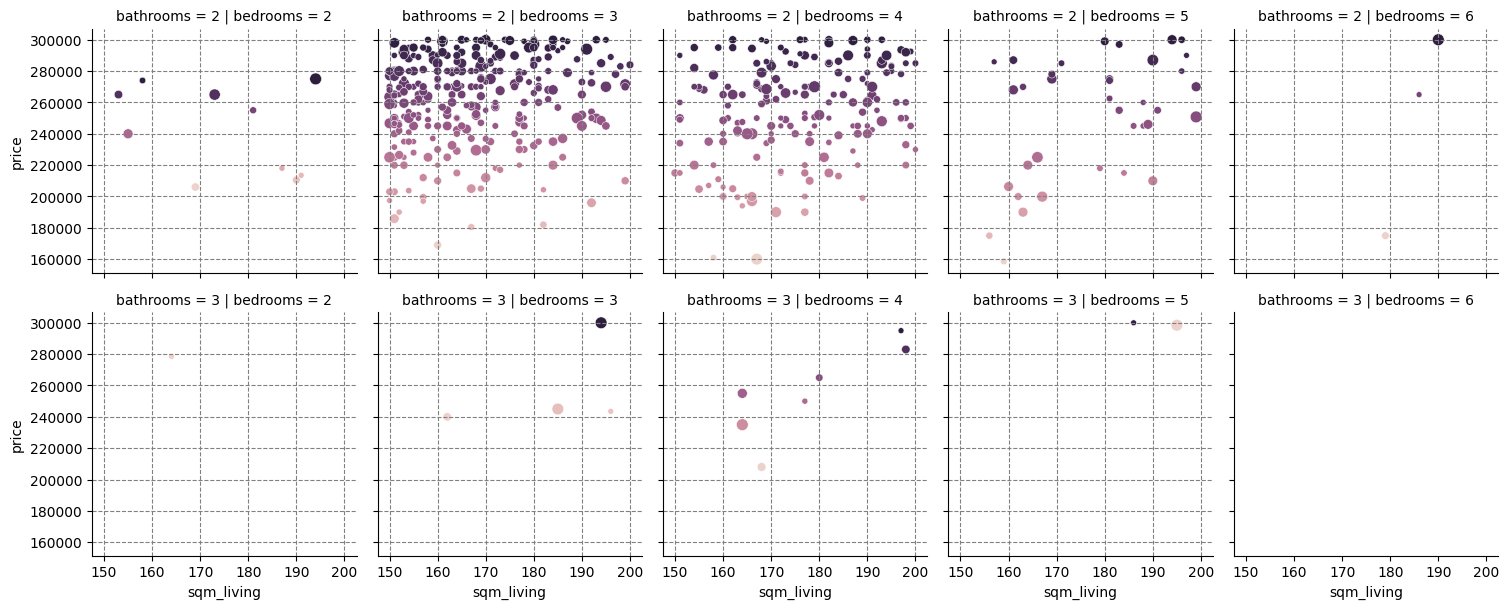

In [361]:
df_op_final = df_op[(df_op['bedrooms'] >= 2) & (df_op['bedrooms'] <= 6) & 
                    (df_op['bathrooms'] >= 2) & (df_op['bathrooms'] <= 3) & 
                    (df_op['sqm_living'] >= 150) & (df_op['sqm_living'] <= 200) & 
                    (df_op['sqm_lot'] >= 700) & (df_op['sqm_lot'] <= 1400) & 
                    (df_op['price'] >= 0) & (df_op['price'] <= 300000)
                    ]

df_op_final.sort_values('price')


g = sns.FacetGrid(df_op_final, col='bedrooms', row='bathrooms', height=3, aspect=1)

g.map_dataframe(sns.scatterplot, x='sqm_living', y='price', hue='price', size='sqm_lot')

g.map(plt.grid, linestyle='--', color='gray')

g.set_axis_labels('sqm_living', 'price')

#g.fig.suptitle('Price vs Price per sqm for bedrooms, bathrooms, sqm_living_cat', fontsize=10)

plt.show()

In [362]:
df_op_final.describe()

,price,price_sqm,sqm_living,sqm_lot,bedrooms,bathrooms,lat,long,sales_month
count,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000,544.000
mean,258793.072,1518.382,171.316,882.415,3.476,2.026,47.374,-122.236,6.526
std,29837.813,199.085,14.070,160.372,0.681,0.158,0.096,0.117,3.288
min,158550.000,958.000,150.000,700.000,2.000,2.000,47.191,-122.400,1.000
25%,240750.000,1385.000,160.000,758.000,3.000,2.000,47.311,-122.320,4.000
50%,264950.000,1530.000,169.000,836.000,3.000,2.000,47.361,-122.268,6.000
75%,282250.000,1662.000,182.000,959.250,4.000,2.000,47.436,-122.176,9.000
max,300000.000,1974.000,200.000,1400.000,6.000,3.000,47.776,-121.730,12.000


In [363]:
df_op_q2 = df_op[(df_op['bedrooms'] == 3) & 
                    (df_op['bathrooms'] >= 2) & 
                    (df_op['sqm_living'] >= 150) & (df_op['sqm_living'] <= 200) & 
                    (df_op['sqm_lot'] >= 700) & (df_op['sqm_lot'] <= 1400) & 
                    (df_op['price'] >= 0) & (df_op['price'] <= 300000)
                    ]

df_op_q2.sort_values('price')


,price,price_cat,price_sqm,sqm_living,sqm_living_cat,sqm_lot,bedrooms,bathrooms,lat,long,sales_month,sales_month_name
15142,169000,100k-200k,1056,160,100-200,908,3,2,47.373,-122.286,10,Oct
2124,180500,100k-200k,1081,167,100-200,791,3,2,47.364,-122.185,10,Oct
11285,182000,100k-200k,1000,182,100-200,825,3,2,47.334,-122.301,7,Jul
5371,185850,100k-200k,1231,151,100-200,1083,3,2,47.446,-122.278,3,Mar
15330,190000,100k-200k,1250,152,100-200,718,3,2,47.358,-122.039,5,May
...,...,...,...,...,...,...,...,...,...,...,...,...
12976,300000,200k-300k,1554,193,100-200,913,3,2,47.306,-122.394,5,May
14053,300000,200k-300k,1786,168,100-200,765,3,2,47.319,-122.273,3,Mar
16033,300000,200k-300k,1899,158,100-200,788,3,2,47.262,-122.305,10,Oct
18664,300000,200k-300k,1863,161,100-200,932,3,2,47.311,-122.345,10,Oct


In [364]:
# create geo heatmap with plotly express using lat and long of df_op_q2
fig = px.density_mapbox(df_op_q2, lat='lat', lon='long', z='price', radius=10, zoom=9, height=600)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0, 't':0, 'l':0, 'b':0})
fig.show()



# Question 3

In [365]:
df_op_q3 = df_op[(df_op['bedrooms'] >= 2) & (df_op['bedrooms'] <= 6) & 
                    (df_op['bathrooms'] >= 2) & (df_op['bathrooms'] <= 3) & 
                    (df_op['sqm_living'] >= 150) & (df_op['sqm_living'] <= 200) & 
                    (df_op['sqm_lot'] >= 700) & (df_op['sqm_lot'] <= 1400) & 
                    (df_op['price'] >= 0) & (df_op['price'] <= 300000)
                    ]

df_op_q3.sort_values('price')


,price,price_cat,price_sqm,sqm_living,sqm_living_cat,sqm_lot,bedrooms,bathrooms,lat,long,sales_month,sales_month_name
5572,158550,100k-200k,997,159,100-200,753,5,2,47.384,-122.288,10,Oct
11745,160000,100k-200k,958,167,100-200,1368,4,2,47.487,-122.223,2,Feb
13170,161000,100k-200k,1019,158,100-200,747,4,2,47.476,-122.288,8,Aug
15142,169000,100k-200k,1056,160,100-200,908,3,2,47.373,-122.286,10,Oct
2808,175000,100k-200k,1122,156,100-200,780,5,2,47.303,-122.307,2,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...
7111,300000,200k-300k,1579,190,100-200,1004,6,2,47.492,-122.181,5,May
7227,300000,200k-300k,1554,193,100-200,715,4,2,47.435,-122.170,9,Sep
16657,300000,200k-300k,1531,196,100-200,790,5,2,47.774,-122.350,11,Nov
12976,300000,200k-300k,1554,193,100-200,913,3,2,47.306,-122.394,5,May


In [366]:
df_op_q3 = df_op[(df_op['bedrooms'] >= 2) & (df_op['bedrooms'] <= 6) & 
                    (df_op['bathrooms'] >= 2) & (df_op['bathrooms'] <= 3) & 
                    (df_op['sqm_living'] >= 150) & (df_op['sqm_living'] <= 200) & 
                    (df_op['sqm_lot'] >= 700) & (df_op['sqm_lot'] <= 1400) & 
                    (df_op['price'] >= 0) & (df_op['price'] <= 265000)
                    ]


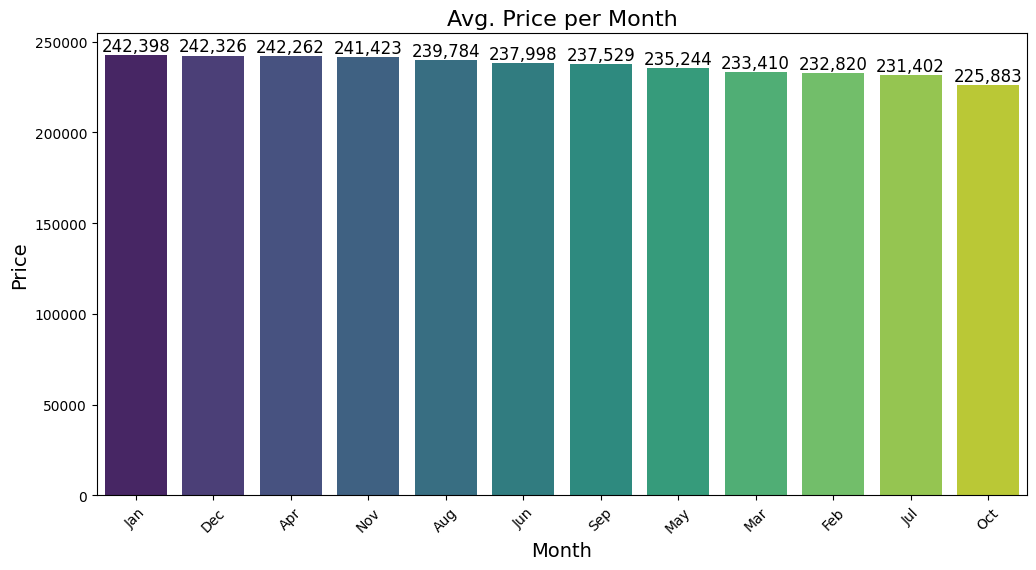

In [399]:


df_op_q3_viz = df_op_q3.groupby('sales_month_name')['price'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='sales_month_name', y='price', data=df_op_q3_viz, palette='viridis')
plt.title('Avg. Price per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
# add value labels with dot a delimiter for thousands
for i in range(len(df_op_q3_viz)):
    plt.text(i, df_op_q3_viz['price'][i], f'{df_op_q3_viz["price"][i]:,.0f}', ha='center', va='bottom', fontsize=12)
    
    
plt.show()




checken ob durchschnittspreis in den monaten

In [333]:
df_op_q3.describe()

,price,price_sqm,sqm_living,sqm_lot,bedrooms,bathrooms,lat,long,sales_month
count,288.000,288.000,288.000,288.000,288.000,288.000,288.000,288.000,288.000
mean,236596.896,1400.955,169.847,877.024,3.507,2.028,47.366,-122.242,6.476
std,23062.604,170.038,13.877,154.869,0.693,0.165,0.086,0.100,3.353
min,158550.000,958.000,150.000,700.000,2.000,2.000,47.191,-122.400,1.000
25%,220000.000,1284.000,158.000,753.000,3.000,2.000,47.310,-122.311,4.000
50%,245000.000,1400.000,168.000,836.000,3.000,2.000,47.350,-122.266,6.000
75%,254000.000,1527.000,181.000,951.250,4.000,2.000,47.419,-122.182,9.000
max,265000.000,1757.000,200.000,1376.000,6.000,3.000,47.770,-121.982,12.000


In [368]:
#from df_op_q3.value_counts('sales_month') extract all month under median
